# Attention weights from Attention-based LSTM

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame from output features and test labels
data = pd.DataFrame(output_feature)
classes = pd.DataFrame(y_test)

# Reset index for consistent DataFrame merging
classes2 = classes.reset_index(drop=True)

# Combine the two DataFrames
comb = pd.concat([data, classes2], axis=1)
comb.columns = [f'band{i}' for i in range(1, comb.shape[1]+1)]  # Rename columns
comb.rename(columns={'band23': 'class'}, inplace=True)  # Rename last column as 'class'

# Replace class labels with numeric codes
comb['class'].replace(to_replace=['Maize', 'Soybean', 'Other crops'], value=[2, 3, 6], inplace=True)

# Separate the data by class
maize = comb[comb['class'] == 2]
soybean = comb[comb['class'] == 3]
other_crops = comb[comb['class'] == 6]

# Select the feature columns
feature_columns = ['band'+str(i) for i in range(1, comb.shape[1])]

# Extract features and labels for each class
M = maize[feature_columns]
ML = maize['class']
S = soybean[feature_columns]
O = other_crops[feature_columns]

# Convert features to numpy arrays
res_M = np.array(M.values.tolist())
res_S = np.array(S.values.tolist())
res_O = np.array(O.values.tolist())

# Function to normalize data
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Apply normalization to the 'other crops' data
cc = NormalizeData(res_O)

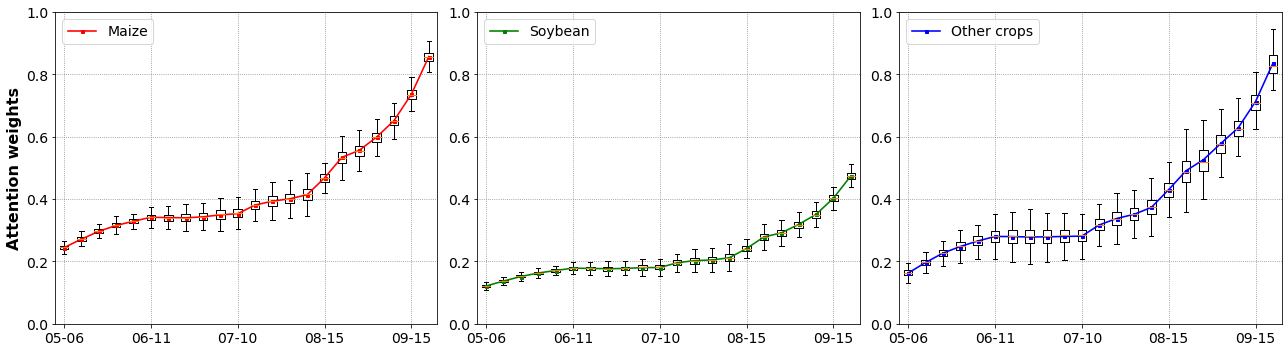

In [ ]:
plt.figure(figsize=(18, 5))
xticks = range(1, M.shape[1] + 1, 5)
plt.rc('grid', linestyle=":", color='grey')

##### maize
plt.subplot("131")
plt.boxplot(aa, sym="")
plt.plot(
    range(1, aa.shape[1] + 1), aa.mean(axis=0),
    "rs-", linewidth=1.6, markersize=3, label="Maize")
plt.xticks(xticks, xticks)
plt.xticks(np.arange(1,22,5),('05-06', '06-11', '07-10','08-15','09-15'))
plt.ylim(0, 1,0.1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
#plt.xlabel("Weeks after April 15")
plt.ylabel("Attention weights",size=16,fontweight="bold")
#plt.title("Maize",size=15,fontweight="bold")
plt.legend(loc="upper left",fontsize=14)
#### soybean
plt.subplot("132")
plt.boxplot(bb, sym="")
plt.plot(
    range(1, bb.shape[1] + 1), bb.mean(axis=0),
    "gs-", linewidth=1.6, markersize=3, label="Soybean"
)
plt.xticks(xticks, xticks)
plt.xticks(np.arange(1,22,5),('05-06', '06-11', '07-10','08-15','09-15'))
plt.tick_params(axis='both', which='major', labelsize=14)

plt.ylim(0, 1,0.1)
plt.grid(True)

#plt.xlabel("Weeks after April 15")
#plt.ylabel("Attention value")
#plt.title("Soybean",size=15,fontweight="bold")
plt.legend(loc="upper left",fontsize=14)
###### other crops
plt.subplot("133")
plt.boxplot(cc, sym="")
plt.plot(
    range(1, cc.shape[1] + 1), cc.mean(axis=0),
    "bs-", linewidth=1.6, markersize=3, label="Other crops"
)
plt.xticks(xticks, xticks)
plt.xticks(np.arange(1,22,5),('05-06', '06-11', '07-10','08-15','09-15'))
plt.ylim(0, 1,0.1)
#plt.xlabel("Weeks after April 15")
#plt.ylabel("Attention value")
#plt.title("Other crops",size=15,fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.grid(True)
plt.tight_layout()

plt.legend(loc="upper left",fontsize=14)
plt.savefig('gdrive/My Drive/Plots/attention weights for crops.png', dpi=600)

# Feature maps from Conv1D

In [ ]:
plt.figure(figsize=(11,2))
#plt.tight_layout
#plt.xticks([0, 5, 10, 15, 20], ['05-06', '06-11', '07-10','08-15','09-15'])
#plt.xticks(np.arange(0, 22, 5))  # start stop step


#maize 64
plt.subplot(1,3,1)
plt.imshow(x,aspect='auto', cmap='afmhot')
plt.ylabel('Residential')
plt.xticks([0, 5, 10, 15, 20], ['05-06', '06-11', '07-10','08-15','09-15'])
#plt.title('Layer 1 64 channels')
plt.gca().invert_yaxis()

#maize 128
plt.subplot(1,3,2)
plt.imshow(x2,aspect='auto', cmap='afmhot')
plt.xticks([0, 5, 10, 15, 20], ['05-06', '06-11', '07-10','08-15','09-15'])
#plt.title('Layer 2 128 channels')
plt.gca().invert_yaxis()
plt.yticks([])

#maize256
plt.subplot(1,3,3)
plt.imshow(x3,aspect='auto', cmap='afmhot',vmin=0 )
#plt.title('Layer 3 256 channels')
plt.yticks([])
plt.xticks([0, 5, 10, 15, 20], ['05-06', '06-11', '07-10','08-15','09-15'])
plt.gca().invert_yaxis()

plt.tight_layout()
plt.colorbar(fraction=0.046, pad=0.04)


plt.savefig('gdrive/My Drive/Plots/feature map maize.png',bbox_inches='tight', dpi=600)

# Average feature map, e.g., maize

In [ ]:
mai_64 = np.array(successive_feature_maps1)
mai_67 = np.array(successive_feature_maps2)
mai_71 = np.array(successive_feature_maps3)
mai_64 = mai_64.mean(axis=0)
mai_67 = mai_67.mean(axis=0)
mai_71 = mai_71.mean(axis=0)

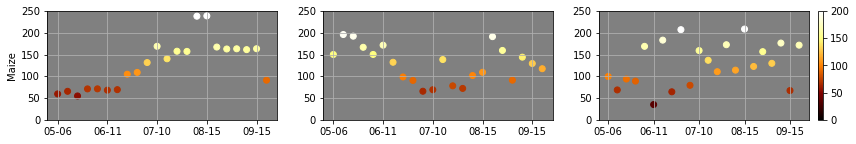

In [ ]:
#Maize
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize = (14,2))

ax1.scatter(dd,mai_64[:,10],c=mai_64[:,10],cmap='afmhot',vmin=0, vmax=200)
ax1.set_facecolor('grey')
ax1.set_xticks([0, 5, 10, 15, 20])
ax1.set_xticklabels(['05-06', '06-11', '07-10','08-15','09-15'])
ax1.grid(True)
ax1.set_ylim([0, 250])
ax1.set_ylabel('Maize')


ax2.scatter(dd,mai_67[:,87],c=mai_67[:,87],cmap='afmhot',vmin=0, vmax=200)
ax2.set_facecolor('grey')
ax2.set_xticks([0, 5, 10, 15, 20])
ax2.set_xticklabels(['05-06', '06-11', '07-10','08-15','09-15'])
ax2.grid(True)
ax2.set_ylim([0, 250])


xx = ax3.scatter(dd,mai_71[:,187],c=mai_71[:,187],cmap='afmhot',vmin=0, vmax=200)
ax3.set_facecolor('grey')
ax3.set_xticks([0, 5, 10, 15, 20])
ax3.set_xticklabels(['05-06', '06-11', '07-10','08-15','09-15'])
ax3.grid(True)
ax3.set_ylim([0, 250])


plt.colorbar(xx,ax=ax3,fraction=0.046, pad=0.04)

plt.savefig('gdrive/My Drive/Plots/feature map maize_average.png', dpi=600)

# t-SNE plots

In [ ]:
def project_to_2d(feature):
    transformer = PCA(n_components=50)
    transformed = transformer.fit_transform(feature)
    tsne = TSNE(n_components=2, verbose=1, perplexity=1500)
    return tsne.fit_transform(transformed)

In [ ]:
x_list, class_name_list = [], []
class_names = ["Maize", "Soybean","Other crops"]
translator = {"Maize": 2, "Soybean": 3,"Other crops":6}

In [ ]:
for class_name in class_names:
    x_class = X_test[y_test==translator[class_name]]
    np.random.seed(42)
    class_sample_index = np.random.choice(
        x_class.shape[0], size=5000, replace=False
    )
    x_class_sample = x_class[class_sample_index]
    x_list.append(x_class_sample)
    class_name_list.append(np.full((5000,), class_name))
x_sample = np.concatenate(x_list)
class_name_sample = np.concatenate(class_name_list)

In [ ]:
from keras.models import Model
layer_name = 'dense_13'
FC_layer_model = Model(inputs=model_June.input, outputs=model_June.get_layer(layer_name).output)

In [ ]:
output_feature = FC_layer_model.predict(x_sample)

In [ ]:
hidden_feature = output_feature.reshape(output_feature.shape[0], -1) # hidden feature

In [ ]:
tsne_result_hidden_feature_May = project_to_2d(hidden_feature) # May, Jun, Aug and so on

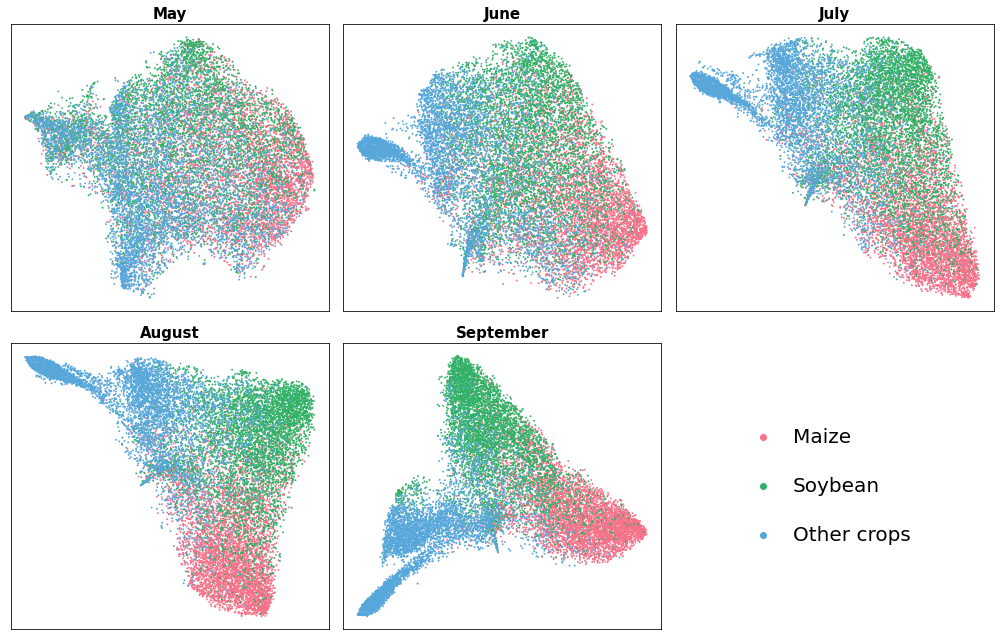

In [ ]:
plt.figure(figsize=(14, 9))
plt.subplot(2, 3, 1)
scatter_plot(tsne_result_hidden_feature_May)
plt.title("May",fontsize=15, fontweight="bold")

plt.subplot(2, 3, 2)
scatter_plot(tsne_result_hidden_feature_June)
plt.title("June",fontsize=15, fontweight="bold")

plt.subplot(2, 3, 3)
scatter_plot(tsne_result_hidden_feature_July)
plt.title("July",fontsize=15, fontweight="bold")

plt.subplot(2, 3, 4)
scatter_plot(tsne_result_hidden_feature_Aug)
plt.title("August",fontsize=15, fontweight="bold")

plt.subplot(2, 3, 5)
scatter_plot(tsne_result_hidden_feature_Sep)
plt.title("September",fontsize=15, fontweight="bold")


plt.tight_layout()

plt.legend(
    loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1), ncol=1,
    handletextpad=0.5, labelspacing=1.5, frameon=False,
    prop={'size': 20}
)

plt.savefig('gdrive/My Drive/Plots/t-sne.png', dpi=600)
plt.show()